In [1]:
# Home loan data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

#!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.utils.validation import validate_data

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



2025-06-12 22:48:09.153252: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/muralibalusa/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load the Home loan dataset
df = pd.read_csv('loan_data.csv') 

#head
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#tail
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [4]:
#shape
df.shape

(307511, 122)

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Check for missing values
print(df.isnull())  # Shows True for null values

        SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            False   False               False        False         False   
1            False   False               False        False         False   
2            False   False               False        False         False   
3            False   False               False        False         False   
4            False   False               False        False         False   
...            ...     ...                 ...          ...           ...   
307506       False   False               False        False         False   
307507       False   False               False        False         False   
307508       False   False               False        False         False   
307509       False   False               False        False         False   
307510       False   False               False        False         False   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0   

In [7]:
#finding missing values
print(df.isnull().sum())  # Counts null values per column


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [8]:
null_percent = df.isnull().sum()/df.shape[0] * 100
print("Null value percentage per column:\n", null_percent[null_percent > 0].sort_values(ascending=False))


Null value percentage per column:
 COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64


In [9]:
#finding duplicates
df.duplicated().sum()

0

In [10]:
#identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
******************************
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
******************************
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
******************************
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
******************************
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
******************************
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
************************

In [11]:
# Handling missing values (if any)
# like mean, median, mode
df = df.dropna()

In [12]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 8.1+ MB


In [13]:
# Exploratory Data Analysis (EDA)
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,8602.000000,8602.000000,8602.000000,8.602000e+03,8.602000e+03,8602.000000,8.602000e+03,8602.000000,8602.000000,8602.000000,...,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,279002.948617,0.061149,0.602534,2.228724e+05,6.999987e+05,31558.948326,6.338337e+05,0.023543,-14189.009416,-2299.091374,...,0.009998,0.000581,0.001046,0.000233,0.005813,0.005929,0.039061,0.368984,0.258080,1.757615
std,103218.951947,0.239617,0.775007,1.414204e+05,4.649119e+05,16587.353415,4.294083e+05,0.016361,3259.202657,2077.178768,...,0.099493,0.024104,0.032331,0.015247,0.077537,0.095655,0.208770,1.049016,0.596765,1.756799
min,100083.000000,0.000000,0.000000,3.375000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-24835.000000,-14375.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188965.750000,0.000000,0.000000,1.350000e+05,3.150000e+05,19548.000000,2.700000e+05,0.010556,-16299.750000,-3132.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278239.000000,0.000000,0.000000,1.935000e+05,5.850000e+05,29209.500000,4.950000e+05,0.020246,-13883.500000,-1680.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,370083.500000,0.000000,1.000000,2.700000e+05,9.581445e+05,40320.000000,9.000000e+05,0.030755,-11664.500000,-817.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456226.000000,1.000000,5.000000,4.500000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7715.000000,-4.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,17.000000


In [14]:
df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,8602.0,279002.948617,103218.951947,100083.0,188965.75,278239.0,370083.5,456226.0
TARGET,8602.0,0.061149,0.239617,0.0,0.00,0.0,0.0,1.0
CNT_CHILDREN,8602.0,0.602534,0.775007,0.0,0.00,0.0,1.0,5.0
AMT_INCOME_TOTAL,8602.0,222872.414439,141420.411520,33750.0,135000.00,193500.0,270000.0,4500000.0
AMT_CREDIT,8602.0,699998.701639,464911.858971,45000.0,315000.00,585000.0,958144.5,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,8602.0,0.005929,0.095655,0.0,0.00,0.0,0.0,4.0
AMT_REQ_CREDIT_BUREAU_WEEK,8602.0,0.039061,0.208770,0.0,0.00,0.0,0.0,4.0
AMT_REQ_CREDIT_BUREAU_MON,8602.0,0.368984,1.049016,0.0,0.00,0.0,0.0,16.0
AMT_REQ_CREDIT_BUREAU_QRT,8602.0,0.258080,0.596765,0.0,0.00,0.0,0.0,8.0


In [15]:
df.describe(include="object")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,8602,8602,8602,8602,8602,8602,8602,8602,8602,8602,8602,8602,8602,8602,8602,8602
unique,2,2,1,2,7,3,5,5,6,18,7,55,4,3,7,2
top,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,MONDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,7660,4381,8602,5916,7174,5050,4646,6139,7648,1967,1499,2607,6523,8507,4100,8529


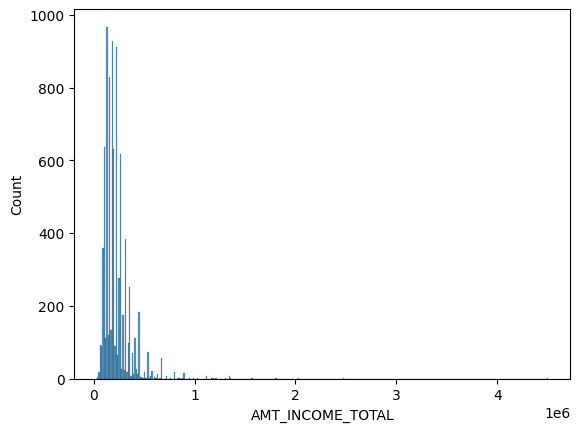

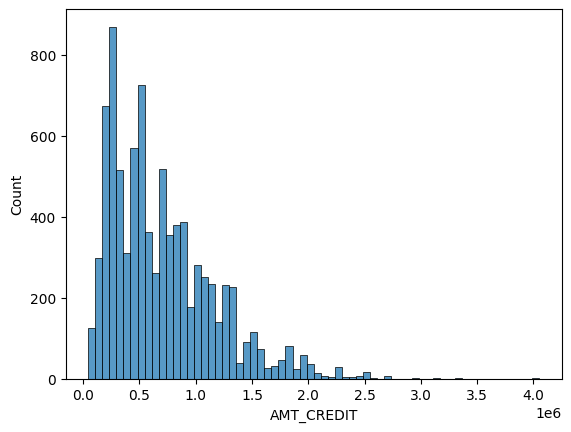

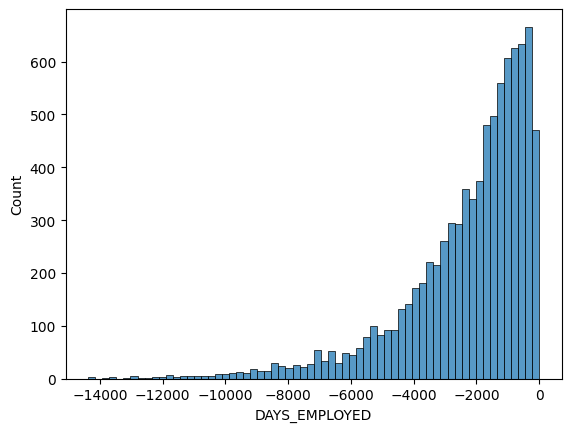

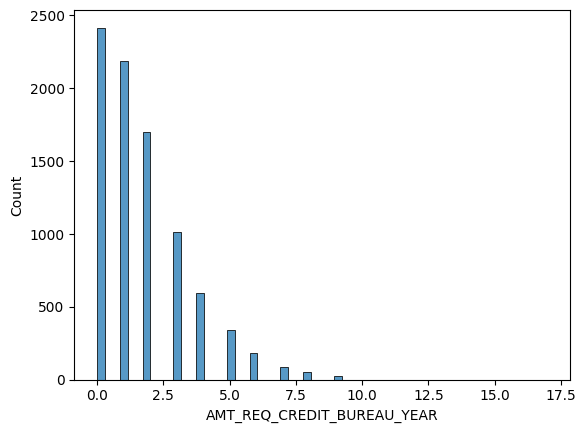

In [16]:
#histogram to understand the distribution
#for i in df.select_dtypes(include="number").columns:
#    sns.histplot(data=df, x=i)
#    plt.show()

for i in ['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    sns.histplot(data=df, x=i)
    plt.show()
    

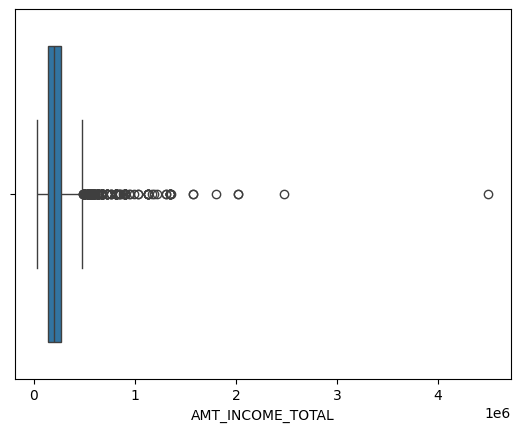

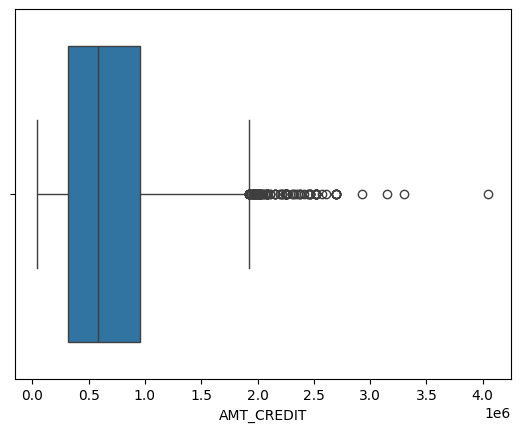

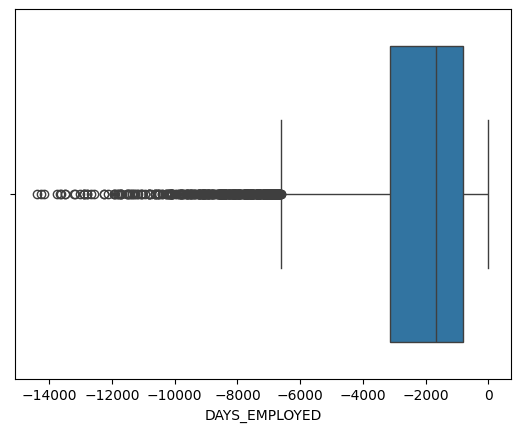

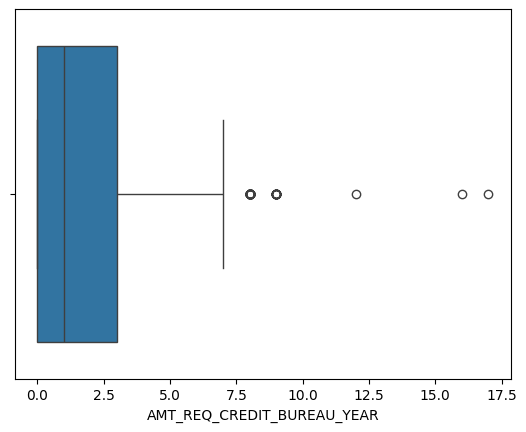

In [17]:
#Boxplot to identify Outliers
#for i in df.select_dtypes(include="number").columns:
#    sns.boxplot(data=df, x=i)
#    plt.show()

for i in ['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    sns.boxplot(data=df, x=i)
    plt.show()

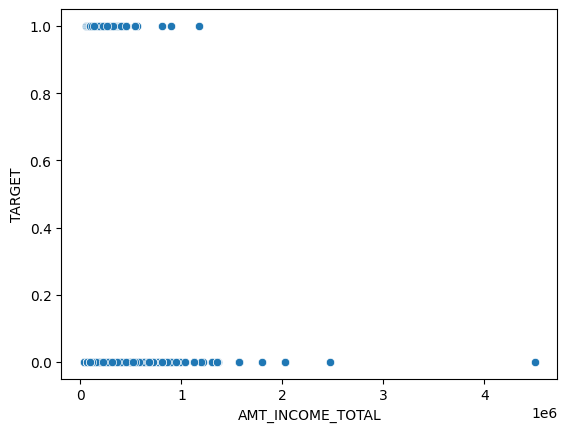

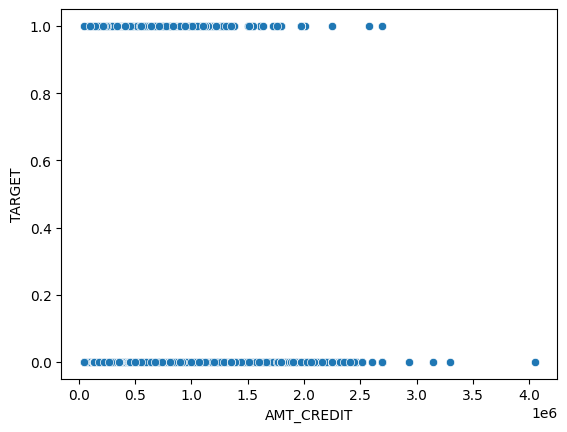

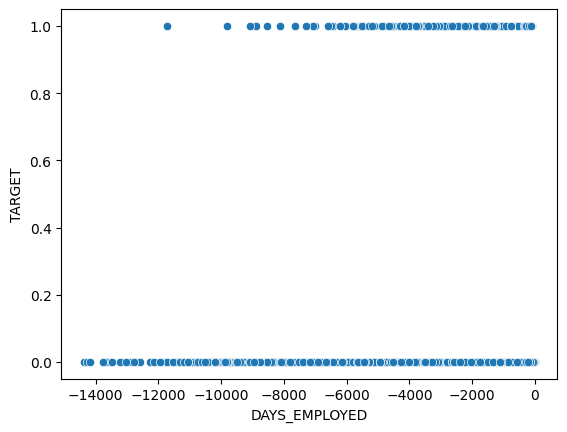

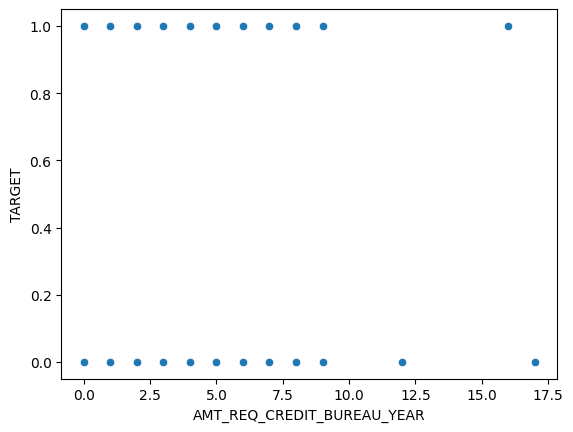

In [18]:
#scatter plot to understand the relationship

for i in ['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    sns.scatterplot(data=df, x=i, y='TARGET')
    plt.show()

    #df.select_dtypes(include="number").columns.to_list()

In [19]:
#correlation with heatmap to interpret the relation and multicolliniarity
#s = df.select_dtypes(include="number").corr()

In [20]:
#plt.figure(figsize=(100,100))
#sns.heatmap(s, annot=True)

In [21]:
print(df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [22]:
df.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [23]:
# Check class imbalance
print("Default distribution (TARGET):")
print(df["TARGET"].value_counts(normalize=True) * 100)

Default distribution (TARGET):
TARGET
0    93.885143
1     6.114857
Name: proportion, dtype: float64


In [24]:
# Calculate the percentage of repaid loans
default_pct = df['TARGET'].mean() * 100
print(f"\nPercentage of repaid loans: {default_pct:.2f}%")


Percentage of repaid loans: 6.11%


In [25]:
# Separate features and target variable
X = df.drop(columns=["TARGET", "SK_ID_CURR"])
y = df["TARGET"]

In [26]:
# Drop ID and handle nulls
df.fillna(df.median(numeric_only=True), inplace=True)

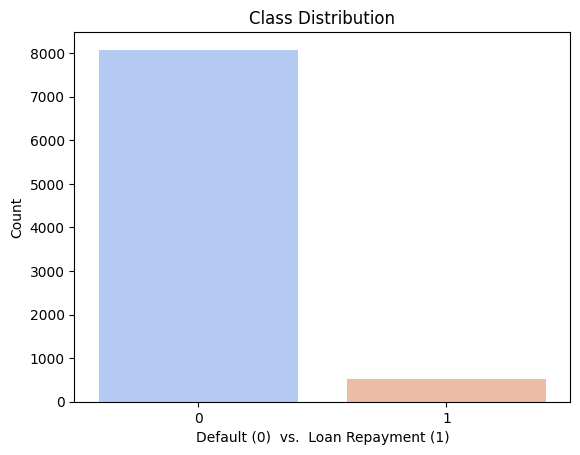

In [27]:
# Plot class distribution
sns.countplot(x="TARGET", hue="TARGET", data=df, palette="coolwarm", legend=False)
plt.title("Class Distribution")
plt.xlabel("Default (0)  vs.  Loan Repayment (1)")
plt.ylabel("Count")
plt.show()

In [28]:
# Identify categorical columns (object or string type)
categorical_cols = X.select_dtypes(include='object').columns

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

X = pd.get_dummies(X, drop_first=True)

In [29]:
# Balance the dataset using SMOTE
# Train-test split AFTER encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Balanced class distribution:", Counter(y_train_bal))

Balanced class distribution: Counter({1: 5653, 0: 5653})


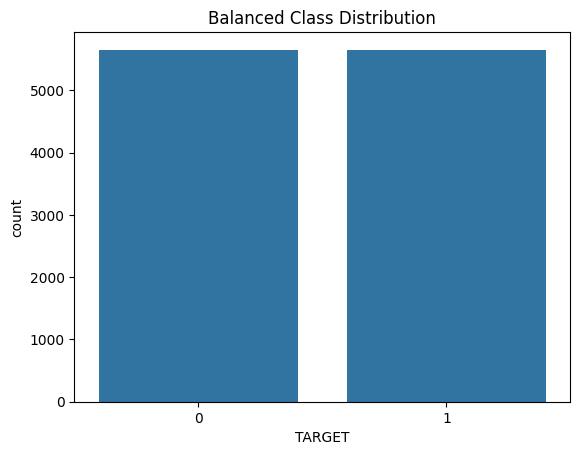

In [30]:
# Optional: Plot class distribution
sns.countplot(x=y_train_bal)
plt.title("Balanced Class Distribution")
plt.show()

In [31]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Build a deep learning model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Use Input() explicitly
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

In [33]:
# Train the model
model.fit(X_train_scaled, y_train_bal, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - Recall: 0.3633 - loss: 0.6254 - val_Recall: 0.7538 - val_loss: 0.5524
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.7707 - loss: 0.3640 - val_Recall: 0.8784 - val_loss: 0.3258
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.8089 - loss: 0.3105 - val_Recall: 0.8815 - val_loss: 0.3005
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.8452 - loss: 0.2527 - val_Recall: 0.9129 - val_loss: 0.2355
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.8623 - loss: 0.2305 - val_Recall: 0.9045 - val_loss: 0.2411
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Recall: 0.8661 - loss: 0.2017 - val_Recall: 0.9315 - val_loss: 0.2009
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.8911 - loss: 0.1842 - val_Recall: 0.9350 - val_loss: 0.1870
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.8985 - loss: 0.1715 - val_Recall: 0.9567 - val_loss: 0.1321
Epoch 9/10
71/71 ━━━━━━━

In [34]:
# Evaluate on the test data
y_pred_probs = model.predict(X_test_scaled).flatten()
y_pred_labels = (y_pred_probs > 0.5).astype(int)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [35]:
# Calculate sensitivity as a metric
sensitivity = recall_score(y_test, y_pred_labels)
auc = roc_auc_score(y_test, y_pred_probs)

print(f"\n Metrics ")
print(f"\n Sensitivity - Recall Score: {sensitivity:.4f}")
print(f" AUC Score: {auc:.4f}")


 Metrics 

 Sensitivity - Recall Score: 0.0823
 AUC Score: 0.6220
